In [ ]:
# 필요 라이브러리 설치
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requ

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 필요 라이브러리 불러오기
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# #pycaret
# import ipywidgets as widgets
# from pycaret.clustering import *

In [ ]:
ROOT = '/content/drive/MyDrive/contest/gwangjin/'

In [ ]:
data = pd.read_csv(ROOT+'data/merged_df_ver6.csv', encoding='utf-8')
data.head(2)

,표준버스정류장ID,버스정류장ARS번호,낮시간대총승객수,밤시간대총승객수,일일총승객수,대규모점포,사업체수,종사자수,낮시간대 생활인구,밤시간대 생활인구,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,행정동
0,101000252,5118,14247.166667,1726.166667,30186.000000,0.0,2350.0,7380.0,9.197688e+07,1.254655e+08,3.0,740.041174,93.098861,1.0,3.238924e+08,0.146777,0.232630,중곡2동
1,104000001,5001,15681.333333,3756.500000,39580.666667,0.0,2152.0,6363.0,8.353262e+07,9.590508e+07,7.0,350.338493,723.257352,3.0,2.708308e+08,0.145448,0.223181,중곡1동


In [ ]:
data_drop = data.drop(['표준버스정류장ID', '버스정류장ARS번호', '대규모점포', '사업체수', '종사자수', '낮시간대 생활인구', '밤시간대 생활인구', '총생활인구수', '65세 이상 생활인구 비율', '1020 생활인구 비율', '행정동'],
                      axis=1)
# 정수형 변환
data_drop = data_drop.astype('int32')
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   낮시간대총승객수            269 non-null    int32
 1   밤시간대총승객수            269 non-null    int32
 2   일일총승객수              269 non-null    int32
 3   환승가능노선수             269 non-null    int32
 4   starbucks_distance  269 non-null    int32
 5   market_distance     269 non-null    int32
 6   count               269 non-null    int32
dtypes: int32(7)
memory usage: 7.5 KB


In [ ]:
# 필요 라이브러리 불러오기
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

In [ ]:
# 정규화

scaler = MinMaxScaler()

scaler.fit(data_drop)
data_sc = scaler.transform(data_drop)

In [ ]:
# 정규화된 결과를 다시 데이터 프레임으로 받기
df_sc = pd.DataFrame(data_sc, columns=data_drop.columns)

df_sc.describe()

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.110083,0.069763,0.103974,0.175651,0.361630,0.329405,0.137546
std,0.140668,0.116543,0.137310,0.221176,0.222905,0.256354,0.207964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022022,0.003620,0.018202,0.000000,0.188751,0.132275,0.000000
50%,0.058783,0.025617,0.054480,0.083333,0.325071,0.240019,0.000000
75%,0.143459,0.091888,0.137104,0.250000,0.515729,0.478595,0.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## DBSCAN

# 하이퍼파라미터 설정
eps = 0.22
min_samples = 2

# 클러스터 선언
cluster = DBSCAN(eps=eps, min_samples=min_samples)

In [ ]:
# 정규화된 결과를 다시 데이터 프레임으로 받기
df_sc = pd.DataFrame(data_sc, columns=data_drop.columns)

df_sc.describe()

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.110083,0.069763,0.103974,0.175651,0.361630,0.329405,0.137546
std,0.140668,0.116543,0.137310,0.221176,0.222905,0.256354,0.207964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022022,0.003620,0.018202,0.000000,0.188751,0.132275,0.000000
50%,0.058783,0.025617,0.054480,0.083333,0.325071,0.240019,0.000000
75%,0.143459,0.091888,0.137104,0.250000,0.515729,0.478595,0.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# DBSCAN 진행 및 결과 저장
df_sc['cluster'] = cluster.fit_predict(df_sc)

# 탐색을 위해 클러스터링 결과와 데이터 합병
df_cluster = pd.concat([df_sc, data[['행정동', '버스정류장ARS번호']]], axis=1)

In [ ]:
# 클러스터 별 행정동 개수 파악 (잘됐는지)
df_cluster.groupby(by='cluster', axis=0, as_index=False)['행정동'].nunique()

,cluster,행정동
0,0,11
1,1,4
2,2,10
3,3,8
4,4,13
5,5,7
6,6,5
7,7,9


In [ ]:
# 건대입구 사거리는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5232]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,cluster,행정동,버스정류장ARS번호
114,1.0,1.0,1.0,1.0,0.032412,0.15392,1.0,0,화양동,5232


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5204]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,cluster,행정동,버스정류장ARS번호
89,0.596284,0.461667,0.619866,0.333333,0.068637,0.112073,0.2,0,자양3동,5204


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5169]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,cluster,행정동,버스정류장ARS번호
68,0.098162,0.025617,0.091449,0.083333,0.300286,0.942761,0.2,7,광장동,5169


In [ ]:
# 같은 클러스터 확인
df_cluster.loc[df_cluster['cluster'] == 7]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,cluster,행정동,버스정류장ARS번호
67,0.013231,0.002320,0.010601,0.083333,0.280267,0.960558,0.2,7,광장동,5168
68,0.098162,0.025617,0.091449,0.083333,0.300286,0.942761,0.2,7,광장동,5169
155,0.171485,0.142565,0.173624,0.166667,0.304099,0.897547,0.2,7,광장동,5012


In [ ]:
# 클러스터링 결과 추출
df_re = df_cluster.loc[df_cluster['cluster'] == 3]
df_re = pd.concat([df_re, data[['대규모점포', '사업체수', '종사자수', '낮시간대 생활인구', '밤시간대 생활인구', '총생활인구수', '65세 이상 생활인구 비율', '1020 생활인구 비율']]], axis=1, join='inner')
df_hgd = df_re.drop(['낮시간대총승객수', '밤시간대총승객수', '일일총승객수', '환승가능노선수', 'starbucks_distance','market_distance', 'count', 'cluster', '행정동'], axis=1)

In [ ]:
# 행정동 데이터 넣어서 재클러스터링

# 하이퍼파라미터 설정
eps = 0.8
min_samples = 3

# 클러스터 선언
cluster = DBSCAN(eps=eps, min_samples=min_samples)

In [ ]:
# DBSCAN 진행 및 결과 저장
df_hgd['cluster'] = cluster.fit_predict(df_hgd)

# 탐색을 위해 클러스터링 결과와 데이터 합병
df_cluster = pd.merge(df_hgd, data[['행정동', '버스정류장ARS번호']])

In [ ]:
# 클러스터 별 행정동 개수 파악 (잘됐는지)
df_cluster.groupby(by='cluster', axis=0, as_index=False)['행정동'].nunique()

,cluster,행정동
0,-1,11


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5169]

,버스정류장ARS번호,대규모점포,사업체수,종사자수,낮시간대 생활인구,밤시간대 생활인구,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,cluster,행정동
14,5169,1.0,2180.0,14269.0,2.038986e+08,2.202890e+08,6.383499e+08,0.118303,0.274873,-1,광장동


# K-medoids

In [ ]:
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 740.1 kB 5.8 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0.dev0-cp39-cp39-linux_x86_64.whl size=1950460 sha256=3d2082c0316875d02a1d30deec462dc31452af9b13e731579d686144678ddd9f
  Stored in directory: /tmp/pip-ephem-wheel-cache-1mt4jkbl/wheels/2a/50/ef/8f550e66b73775b0d138e1bc5ae39027b81675bfe6a0061099
Successfully built scikit-learn-extra


In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
# 정규화된 결과를 다시 데이터 프레임으로 받기
df_sc = pd.DataFrame(data_sc, columns=data_drop.columns)

# 클러스터링
cluster = KMedoids(random_state=22, n_clusters=9).fit(df_sc)

# 결과 저장
labels = cluster.labels_

In [ ]:
# 탐색을 위해 클러스터링 결과와 데이터 합병
df_sc['cluster'] = labels

# 탐색을 위해 클러스터링 결과와 데이터 합병
df_cluster = pd.concat([df_sc, data[['행정동', '버스정류장ARS번호']]], axis=1)

In [ ]:
# 클러스터 별 행정동 개수 파악 (잘됐는지)
df_cluster.groupby(by='cluster', axis=0, as_index=False)['행정동'].nunique()

,cluster,행정동
0,0,11
1,1,4
2,2,9
3,3,9
4,4,10
5,5,9
6,6,8
7,7,8
8,8,8


In [ ]:
# 건대입구 사거리는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5232]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,cluster,행정동,버스정류장ARS번호
114,1.0,1.0,1.0,1.0,0.032412,0.15392,1.0,0,화양동,5232


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5169]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,cluster,행정동,버스정류장ARS번호
68,0.098162,0.025617,0.091449,0.083333,0.300286,0.942761,0.2,1,광장동,5169


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5204]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,cluster,행정동,버스정류장ARS번호
89,0.596284,0.461667,0.619866,0.333333,0.068637,0.112073,0.2,0,자양3동,5204


In [ ]:
# 같은 클러스터 확인
df_cluster.loc[df_cluster['cluster'] == 0]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,cluster,행정동,버스정류장ARS번호
1,0.446167,0.348617,0.456484,0.583333,0.309819,0.343915,0.6,0,중곡1동,5001
2,0.320975,0.271394,0.318688,0.583333,0.369876,0.363636,0.6,0,군자동,5002
3,0.434786,0.395953,0.426240,0.500000,0.279314,0.266474,0.2,0,중곡2동,5003
4,0.532607,0.637461,0.562398,0.500000,0.203051,0.302549,0.2,0,능동,5004
6,0.565356,0.451364,0.517181,0.416667,0.050524,0.333814,0.2,0,구의2동,5006
7,0.767029,0.598385,0.754963,0.583333,0.182078,0.264069,0.2,0,능동,5007
45,0.146930,0.064043,0.121532,0.666667,0.029552,0.527177,0.6,0,능동,5140
46,0.197348,0.179321,0.186901,0.666667,0.167779,0.436748,0.6,0,능동,5141
50,0.435725,0.150176,0.382453,0.666667,0.452812,0.418951,0.2,0,구의1동,5145
53,0.690491,0.458233,0.631158,0.666667,0.188751,0.285233,0.2,0,구의1동,5148


In [ ]:
df_cluster.loc[df_cluster['cluster'] == 0, '버스정류장ARS번호'].values

array([5001, 5002, 5003, 5004, 5006, 5007, 5140, 5141, 5145, 5148, 5175,
       5188, 5194, 5204, 5205, 5217, 5218, 5220, 5226, 5227, 5228, 5229,
       5230, 5232, 5234, 5250, 5251, 5252, 5253, 5192, 5499])

In [ ]:
# 클러스터링 결과 추출
df_re = df_cluster.loc[df_cluster['cluster'] == 0].reset_index(drop=True)
df_re = pd.concat([df_re, data[['대규모점포', '사업체수', '종사자수', '낮시간대 생활인구', '밤시간대 생활인구', '총생활인구수', '65세 이상 생활인구 비율', '1020 생활인구 비율']]], axis=1, join='inner')

# 정규화

scaler = MinMaxScaler()

scaler.fit(df_re.drop(['행정동', '버스정류장ARS번호'], axis=1))
data_re = scaler.transform(df_re.drop(['행정동', '버스정류장ARS번호'], axis=1))

# 정규화된 결과를 다시 데이터 프레임으로 받기
df_re_sc = pd.DataFrame(data_re, columns=df_re.drop(['행정동', '버스정류장ARS번호'], axis=1).columns)

In [ ]:
# 행정동 데이터 넣어서 재클러스터링
df_hgd = df_re_sc.drop(['대규모점포', '사업체수', '65세 이상 생활인구 비율', '밤시간대 생활인구', '낮시간대 생활인구'], axis=1)
# df_hgd = df_re_sc.copy()

# 클러스터링
cluster = KMedoids(random_state=22, n_clusters=5).fit(df_hgd)

# 결과 저장
labels = cluster.labels_

# 탐색을 위해 클러스터링 결과와 데이터 합병
df_hgd['cluster'] = labels

# 탐색을 위해 클러스터링 결과와 데이터 합병
df_re_cluster = pd.concat([df_hgd, df_re[['행정동', '버스정류장ARS번호']]], axis=1)

In [ ]:
# 클러스터 별 행정동 개수 파악 (잘됐는지)
df_re_cluster.groupby(by='cluster', axis=0, as_index=False)['행정동'].nunique()

,cluster,행정동
0,0,4
1,1,3
2,2,3
3,3,7
4,4,2


In [ ]:
# 건대입구 사거리는 어느 클러스터에?
df_re_cluster.loc[df_re_cluster['버스정류장ARS번호'] == 5232]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,cluster,종사자수,총생활인구수,1020 생활인구 비율,행정동,버스정류장ARS번호
23,1.0,1.0,1.0,1.0,0.031065,0.131915,1.0,4,0.490343,0.504929,0.193334,화양동,5232


In [ ]:
# 모범사례는 어느 클러스터에?
df_re_cluster.loc[df_re_cluster['버스정류장ARS번호'] == 5204]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,cluster,종사자수,총생활인구수,1020 생활인구 비율,행정동,버스정류장ARS번호
13,0.587169,0.453655,0.611155,0.0,0.087278,0.039362,0.0,3,0.279128,0.000482,0.128775,자양3동,5204


In [ ]:
# 같은 클러스터 확인
df_re_cluster.loc[df_re_cluster['cluster'] == 3]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,cluster,종사자수,총생활인구수,1020 생활인구 비율,행정동,버스정류장ARS번호
2,0.422025,0.386963,0.413092,0.250,0.414201,0.380851,0.0,3,1.000000,0.693046,1.000000,중곡2동,5003
3,0.522054,0.632065,0.552371,0.250,0.295858,0.460638,0.0,3,0.490343,0.504929,0.193334,능동,5004
4,0.555543,0.443199,0.506118,0.125,0.059172,0.529787,0.0,3,0.251298,0.027756,0.439859,구의2동,5006
5,0.761769,0.592408,0.749348,0.375,0.263314,0.375532,0.0,3,0.490343,0.504929,0.193334,능동,5007
9,0.683503,0.450170,0.622707,0.500,0.273669,0.422340,0.0,3,0.279128,0.000482,0.128775,구의1동,5148
10,0.409456,0.198757,0.356385,0.500,0.180473,0.356383,0.0,3,0.279128,0.000482,0.128775,자양1동,5175
13,0.587169,0.453655,0.611155,0.000,0.087278,0.039362,0.0,3,0.279128,0.000482,0.128775,자양3동,5204
16,0.562991,0.457611,0.592831,0.000,0.133136,0.011702,0.0,3,0.000000,0.000000,0.000000,자양4동,5218


In [ ]:
df_re_cluster.loc[df_cluster['cluster'] == 2, '버스정류장ARS번호'].values

array([5194, 5204, 5205, 5217, 5218, 5220, 5230, 5234, 5192, 5499])

# PyCaret

In [ ]:
data.head()

,표준버스정류장ID,버스정류장ARS번호,낮시간대총승객수,밤시간대총승객수,일일총승객수,대규모점포,사업체수,종사자수,낮시간대 생활인구,밤시간대 생활인구,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,행정동
0,101000252,5118,14247.166667,1726.166667,30186.000000,0.0,2350.0,7380.0,9.197688e+07,1.254655e+08,3.0,740.041174,93.098861,1.0,3.238924e+08,0.146777,0.232630,중곡2동
1,104000001,5001,15681.333333,3756.500000,39580.666667,0.0,2152.0,6363.0,8.353262e+07,9.590508e+07,7.0,350.338493,723.257352,3.0,2.708308e+08,0.145448,0.223181,중곡1동
2,104000002,5002,11281.500000,2924.500000,27634.833333,1.0,2389.0,9834.0,1.168754e+08,1.109856e+08,7.0,413.992846,764.569212,3.0,3.436799e+08,0.115274,0.350698,군자동
3,104000003,5003,15281.500000,4266.833333,36958.000000,0.0,2350.0,7380.0,9.197688e+07,1.254655e+08,6.0,318.242961,562.888420,1.0,3.238924e+08,0.146777,0.232630,중곡2동
4,104000004,5004,18719.500000,6868.500000,48762.500000,1.0,1214.0,6229.0,1.030211e+08,7.910175e+07,6.0,238.122978,637.437346,1.0,2.736997e+08,0.129653,0.268713,능동


## 행정동 데이터 제거하고 클러스터링

In [ ]:
# 필요 라이브러리 불러오기
from pycaret.clustering import *

In [ ]:
s = setup(data, normalize=True, session_id=22, ignore_features=['표준버스정류장ID', '버스정류장ARS번호', '행정동', '대규모점포', '사업체수', '종사자수', '낮시간대 생활인구', '밤시간대 생활인구', '총생활인구수', '65세 이상 생활인구 비율', '1020 생활인구 비율'])

,Description,Value
0,Session id,22
1,Original data shape,"(269, 18)"
2,Transformed data shape,"(269, 7)"
3,Ignore features,11
4,Numeric features,7
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


In [ ]:
# 모델 생성 (Functional API)
optics = create_model('optics')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2177,8.1978,1.7348,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

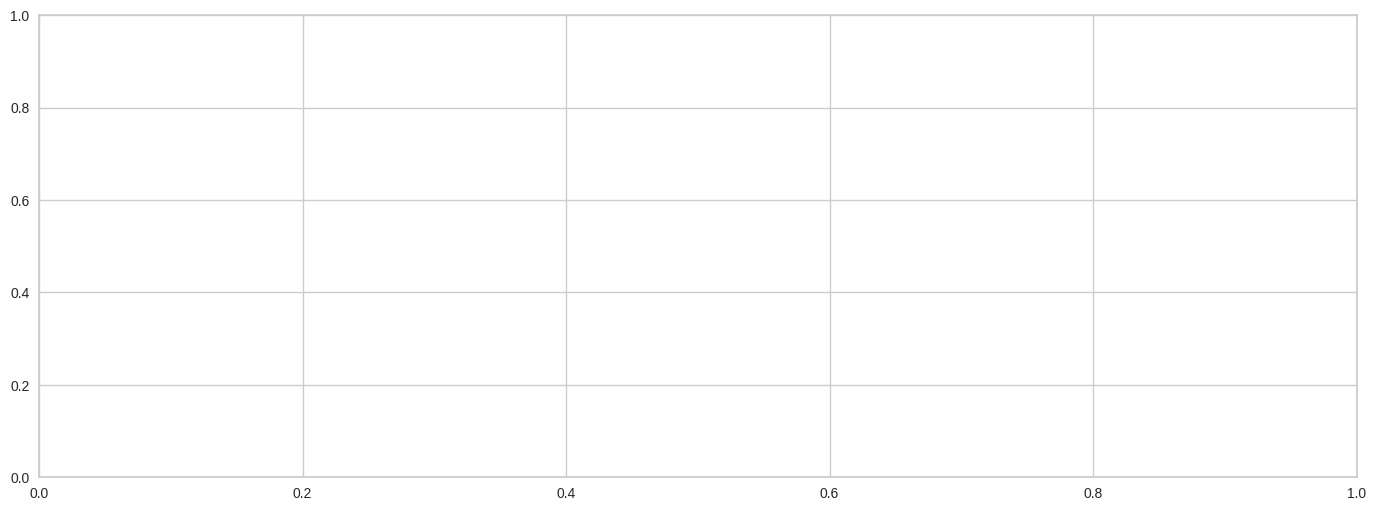

<Figure size 800x550 with 0 Axes>

In [ ]:
evaluate_model(optics)

In [ ]:
# 클러스터링 결과 원본데이터 받아오기
s = setup(data, normalize=True, session_id=22, ignore_features=['표준버스정류장ID', '버스정류장ARS번호', '행정동', '대규모점포', '사업체수', '종사자수', '낮시간대 생활인구', '밤시간대 생활인구', '총생활인구수', '65세 이상 생활인구 비율', '1020 생활인구 비율'])

result = assign_model(optics)

df_cluster = pd.concat([result, data[['행정동', '버스정류장ARS번호']]], axis=1)

In [ ]:
# 클러스터 별 행정동 개수 파악 (잘됐는지)
df_cluster.groupby(by='Cluster', axis=0, as_index=False)['행정동'].nunique()

,Cluster,행정동
0,Cluster -1,15
1,Cluster 0,6
2,Cluster 1,3
3,Cluster 10,3
4,Cluster 11,5
5,Cluster 2,4
6,Cluster 3,1
7,Cluster 4,1
8,Cluster 5,3
9,Cluster 6,4


In [ ]:
# 건대입구 사거리는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5232]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,Cluster,행정동,버스정류장ARS번호
114,35146.332031,10774.666992,86699.335938,12.0,59.584316,328.849854,5.0,Cluster -1,화양동,5232


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5204]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,Cluster,행정동,버스정류장ARS번호
89,20957.0,4974.0,53744.167969,4.0,97.78656,241.094788,1.0,Cluster 11,자양3동,5204


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5169]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,Cluster,행정동,버스정류장ARS번호
68,3450.0,276.166656,7934.666504,1.0,340.466675,1968.143066,1.0,Cluster -1,광장동,5169


In [ ]:
# 같은 클러스터 확인
df_cluster.loc[df_cluster['Cluster'] == 'Cluster 11']

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,Cluster,행정동,버스정류장ARS번호
4,18719.500000,6868.500000,48762.500000,6.0,238.122986,637.437317,1.0,Cluster 11,능동,5004
6,19870.000000,4863.500000,44842.500000,5.0,78.215050,702.566589,1.0,Cluster 11,구의2동,5006
7,26958.833984,6447.333496,65456.500000,7.0,216.765747,557.314453,1.0,Cluster 11,능동,5007
53,24268.166016,4937.500000,54723.332031,8.0,223.763870,601.368591,1.0,Cluster 11,구의1동,5148
89,20957.000000,4974.000000,53744.167969,4.0,97.786560,241.094788,1.0,Cluster 11,자양3동,5204
100,20126.666016,5016.500000,52191.332031,4.0,128.844650,215.016281,1.0,Cluster 11,자양4동,5218


## hclust (AgglomerativeClustering)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2301,108.0804,1.1212,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

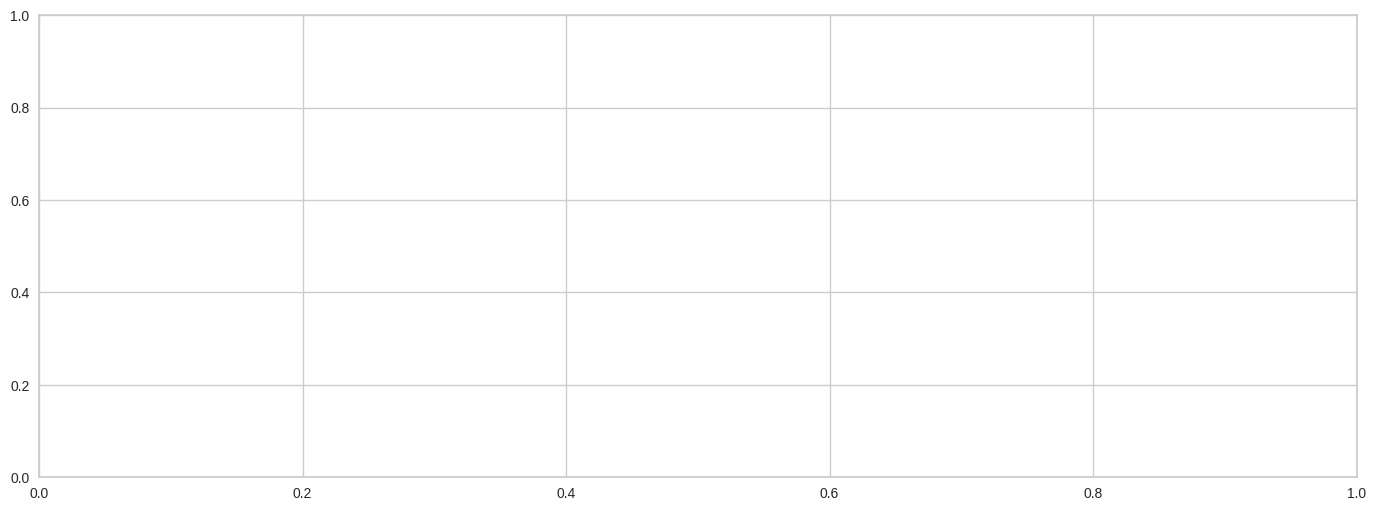

<Figure size 800x550 with 0 Axes>

In [ ]:
# 모델 생성 (Functional API)
hclust = create_model('hclust', num_clusters=5)

evaluate_model(hclust)

In [ ]:
# 클러스터링 결과 원본데이터 받아오기
result = assign_model(hclust)

df_cluster = pd.concat([result, data[['행정동', '버스정류장ARS번호']]], axis=1)

In [ ]:
# 건대입구 사거리는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5232]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,Cluster,행정동,버스정류장ARS번호
114,35146.332031,10774.666992,86699.335938,12.0,59.584316,328.849854,5.0,Cluster 1,화양동,5232


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5204]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,Cluster,행정동,버스정류장ARS번호
89,20957.0,4974.0,53744.167969,4.0,97.78656,241.094788,1.0,Cluster 1,자양3동,5204


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5169]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,Cluster,행정동,버스정류장ARS번호
68,3450.0,276.166656,7934.666504,1.0,340.466675,1968.143066,1.0,Cluster 2,광장동,5169


In [ ]:
# 같은 클러스터 확인
df_cluster.loc[df_cluster['Cluster'] == 'Cluster 2']

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,Cluster,행정동,버스정류장ARS번호
64,546.166687,82.833336,1134.666626,1.0,373.926788,1407.516968,0.0,Cluster 2,구의3동,5163
67,465.500000,25.333334,925.500000,1.0,319.514618,2005.090698,1.0,Cluster 2,광장동,5168
68,3450.000000,276.166656,7934.666504,1.0,340.466675,1968.143066,1.0,Cluster 2,광장동,5169
143,1037.000000,97.750000,3182.500000,1.0,172.961563,1949.511230,0.0,Cluster 2,광장동,5265
166,2042.500000,58.000000,5398.500000,0.0,314.694946,1389.900879,0.0,Cluster 2,구의1동,5679
169,515.500000,8.166667,1081.000000,0.0,196.043945,1646.050781,0.0,Cluster 2,광장동,5670
170,155.666672,2.000000,238.833328,0.0,357.567047,1564.355713,0.0,Cluster 2,광장동,5600
171,1687.500000,61.000000,3112.166748,0.0,308.642761,1686.519531,0.0,Cluster 2,광장동,5597
172,829.333313,22.500000,1439.833374,0.0,73.730568,1815.708496,0.0,Cluster 2,광장동,5595
174,691.833313,46.166668,1484.166626,0.0,86.409698,1883.186279,0.0,Cluster 2,광장동,5591


In [ ]:
df_cluster.loc[df_cluster['Cluster'] == 'Cluster 2', '버스정류장ARS번호'].values

array([5163, 5168, 5169, 5265, 5679, 5670, 5600, 5597, 5595, 5591, 5587,
       5581, 5578, 5565, 5533, 5528, 5514, 5509, 5504, 5744, 5742, 5740,
       5728, 5724, 5732, 5519, 5584, 5993, 5992, 5990, 5671])

### 행정동 데이터 첨가

,Description,Value
0,Session id,22
1,Original data shape,"(269, 18)"
2,Transformed data shape,"(269, 10)"
3,Ignore features,8
4,Numeric features,10
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3744,48.9628,0.7632,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

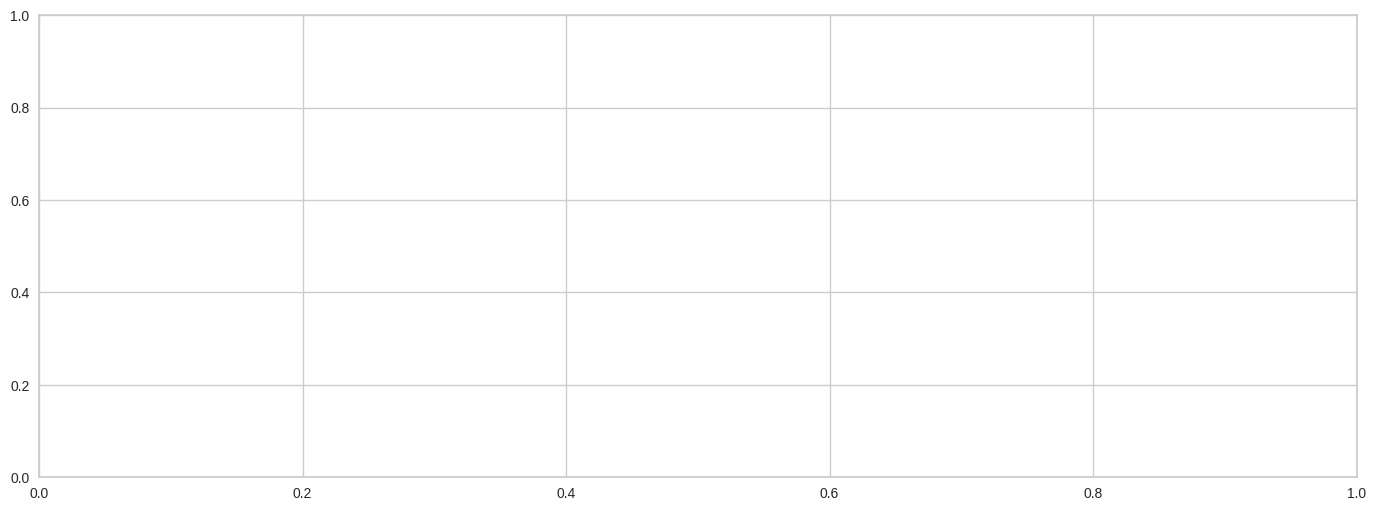

<Figure size 800x550 with 0 Axes>

In [ ]:
# 클러스터링 결과 원본데이터 받아오기
s = setup(data, normalize=True, session_id=22, ignore_features=['표준버스정류장ID', '버스정류장ARS번호', '행정동', '대규모점포', '사업체수', '종사자수', '낮시간대 생활인구', '밤시간대 생활인구'])

sc = create_model('sc', num_clusters=4)

evaluate_model(sc)

In [ ]:
# 클러스터링 결과 원본데이터 받아오기
result = assign_model(sc)

df_cluster = pd.concat([result, data[['행정동', '버스정류장ARS번호']]], axis=1)

In [ ]:
# 건대입구 사거리는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5232]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,Cluster,행정동,버스정류장ARS번호
114,35146.332031,10774.666992,86699.335938,12.0,59.584316,328.849854,5.0,652387776.0,0.08093,0.490105,Cluster 2,화양동,5232


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5204]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,Cluster,행정동,버스정류장ARS번호
89,20957.0,4974.0,53744.167969,4.0,97.78656,241.094788,1.0,412792672.0,0.137371,0.249907,Cluster 2,자양3동,5204


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5169]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,Cluster,행정동,버스정류장ARS번호
68,3450.0,276.166656,7934.666504,1.0,340.466675,1968.143066,1.0,638349888.0,0.118303,0.274873,Cluster 1,광장동,5169


In [ ]:
# 같은 클러스터 확인
df_cluster.loc[df_cluster['Cluster'] == 'Cluster 2']

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,Cluster,행정동,버스정류장ARS번호
1,15681.333008,3756.500000,39580.667969,7.0,350.338501,723.257324,3.0,270830848.0,0.145448,0.223181,Cluster 2,중곡1동,5001
3,15281.500000,4266.833496,36958.000000,6.0,318.242950,562.888428,1.0,323892352.0,0.146777,0.232630,Cluster 2,중곡2동,5003
4,18719.500000,6868.500000,48762.500000,6.0,238.122986,637.437317,1.0,273699712.0,0.129653,0.268713,Cluster 2,능동,5004
6,19870.000000,4863.500000,44842.500000,5.0,78.215050,702.566589,1.0,375967552.0,0.158670,0.236506,Cluster 2,구의2동,5006
7,26958.833984,6447.333496,65456.500000,7.0,216.765747,557.314453,1.0,273699712.0,0.129653,0.268713,Cluster 2,능동,5007
53,24268.166016,4937.500000,54723.332031,8.0,223.763870,601.368591,1.0,443511968.0,0.127300,0.264467,Cluster 2,구의1동,5148
89,20957.000000,4974.000000,53744.167969,4.0,97.786560,241.094788,1.0,412792672.0,0.137371,0.249907,Cluster 2,자양3동,5204
100,20126.666016,5016.500000,52191.332031,4.0,128.844650,215.016281,1.0,441175776.0,0.142101,0.270933,Cluster 2,자양4동,5218
114,35146.332031,10774.666992,86699.335938,12.0,59.584316,328.849854,5.0,652387776.0,0.080930,0.490105,Cluster 2,화양동,5232


In [ ]:
df_cluster.loc[df_cluster['Cluster'] == 'Cluster 0', '버스정류장ARS번호'].values

array([5118, 5001, 5002, 5003, 5004, 5005, 5006, 5007, 5140, 5141, 5145,
       5148, 5175, 5188, 5189, 5190, 5191, 5193, 5194, 5204, 5205, 5216,
       5217, 5218, 5220, 5232, 5250, 5251, 5252, 5253, 5162, 5192, 5249,
       5011, 5594, 5582])

## sc

In [ ]:
# 클러스터링 결과 원본데이터 받아오기
s = setup(data, normalize=True, session_id=22, ignore_features=['표준버스정류장ID', '버스정류장ARS번호', '행정동', '대규모점포', '사업체수', '종사자수', '낮시간대 생활인구', '밤시간대 생활인구', '총생활인구수', '65세 이상 생활인구 비율', '1020 생활인구 비율'])

result = assign_model(optics)

df_cluster = pd.concat([result, data[['행정동', '버스정류장ARS번호']]], axis=1)

,Description,Value
0,Session id,22
1,Original data shape,"(269, 18)"
2,Transformed data shape,"(269, 7)"
3,Ignore features,11
4,Numeric features,7
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2593,94.4395,1.0332,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

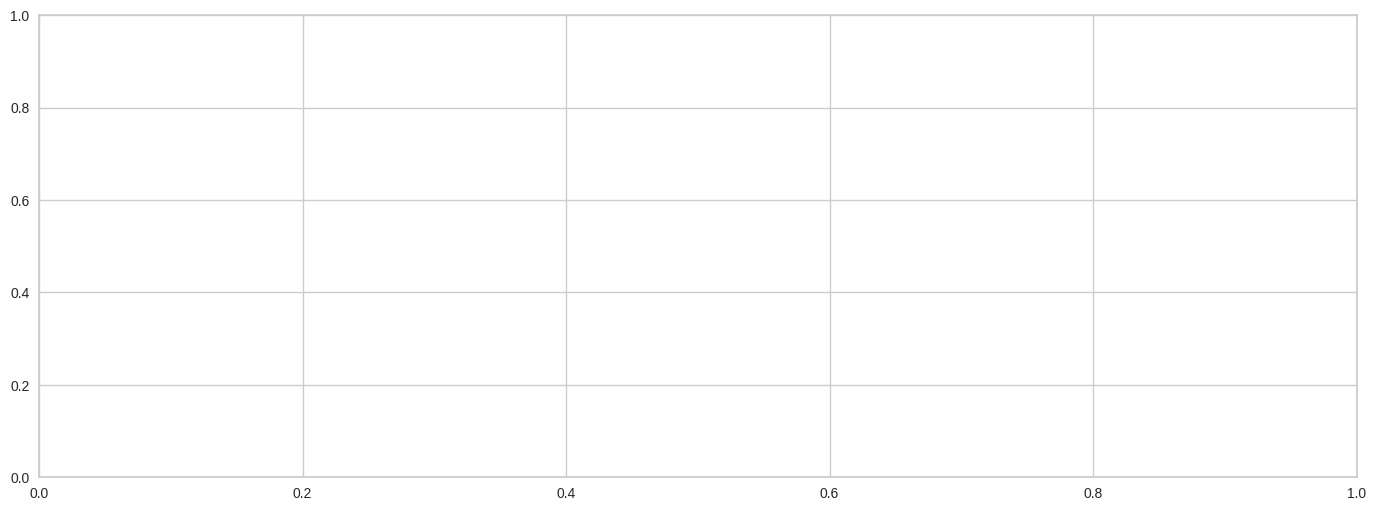

In [ ]:
# 모델 생성 (Functional API)
sc = create_model('birch', num_clusters=7)

evaluate_model(sc)

In [ ]:
# 클러스터링 결과 원본데이터 받아오기
result = assign_model(sc)

df_cluster = pd.concat([result, data[['행정동', '버스정류장ARS번호']]], axis=1)

In [ ]:
# 건대입구 사거리는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5232]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,Cluster,행정동,버스정류장ARS번호
114,35146.332031,10774.666992,86699.335938,12.0,59.584316,328.849854,5.0,Cluster 2,화양동,5232


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5204]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,Cluster,행정동,버스정류장ARS번호
89,20957.0,4974.0,53744.167969,4.0,97.78656,241.094788,1.0,Cluster 2,자양3동,5204


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5169]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,Cluster,행정동,버스정류장ARS번호
68,3450.0,276.166656,7934.666504,1.0,340.466675,1968.143066,1.0,Cluster 6,광장동,5169


In [ ]:
# 같은 클러스터 확인
df_cluster.loc[df_cluster['Cluster'] == 'Cluster 6']

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,Cluster,행정동,버스정류장ARS번호
8,1519.000000,1228.833374,4874.166504,3.0,571.938110,569.341797,1.0,Cluster 6,중곡1동,5101
10,1305.166626,227.000000,2739.166748,1.0,241.688660,579.848022,0.0,Cluster 6,중곡1동,5103
11,3237.666748,972.166687,8972.333008,2.0,226.030991,587.225281,0.0,Cluster 6,중곡1동,5104
12,1051.333374,138.833328,2374.666748,2.0,314.448303,445.938416,0.0,Cluster 6,중곡1동,5105
13,1647.500000,420.166656,3661.500000,1.0,383.417450,373.463531,0.0,Cluster 6,중곡1동,5106
...,...,...,...,...,...,...,...,...,...,...
263,328.500000,2.833333,870.333313,0.0,1021.091675,482.331116,1.0,Cluster 6,중곡4동,5500
264,2642.166748,214.333328,5278.500000,0.0,242.431580,507.920258,0.0,Cluster 6,중곡3동,5755
265,459.666656,86.833336,884.833313,0.0,119.009697,1498.395386,0.0,Cluster 6,광장동,5990
266,217.333328,19.000000,376.500000,0.0,145.110886,1499.883301,0.0,Cluster 6,광장동,5671


In [ ]:
df_cluster.loc[df_cluster['Cluster'] == 'Cluster 0', '버스정류장ARS번호'].values

array([5118, 5001, 5002, 5003, 5004, 5005, 5006, 5007, 5140, 5141, 5145,
       5148, 5175, 5188, 5189, 5190, 5191, 5193, 5194, 5204, 5205, 5216,
       5217, 5218, 5220, 5232, 5250, 5251, 5252, 5253, 5162, 5192, 5249,
       5011, 5594, 5582])

### 행정동 포함

In [ ]:
# 클러스터링 결과 원본데이터 받아오기
s = setup(data, normalize=True, session_id=22, ignore_features=['표준버스정류장ID', '버스정류장ARS번호', '행정동', '대규모점포', '사업체수', '종사자수', '낮시간대 생활인구', '밤시간대 생활인구'])

result = assign_model(optics)

df_cluster = pd.concat([result, data[['행정동', '버스정류장ARS번호']]], axis=1)

,Description,Value
0,Session id,22
1,Original data shape,"(269, 18)"
2,Transformed data shape,"(269, 10)"
3,Ignore features,8
4,Numeric features,10
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2735,39.2691,1.0509,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

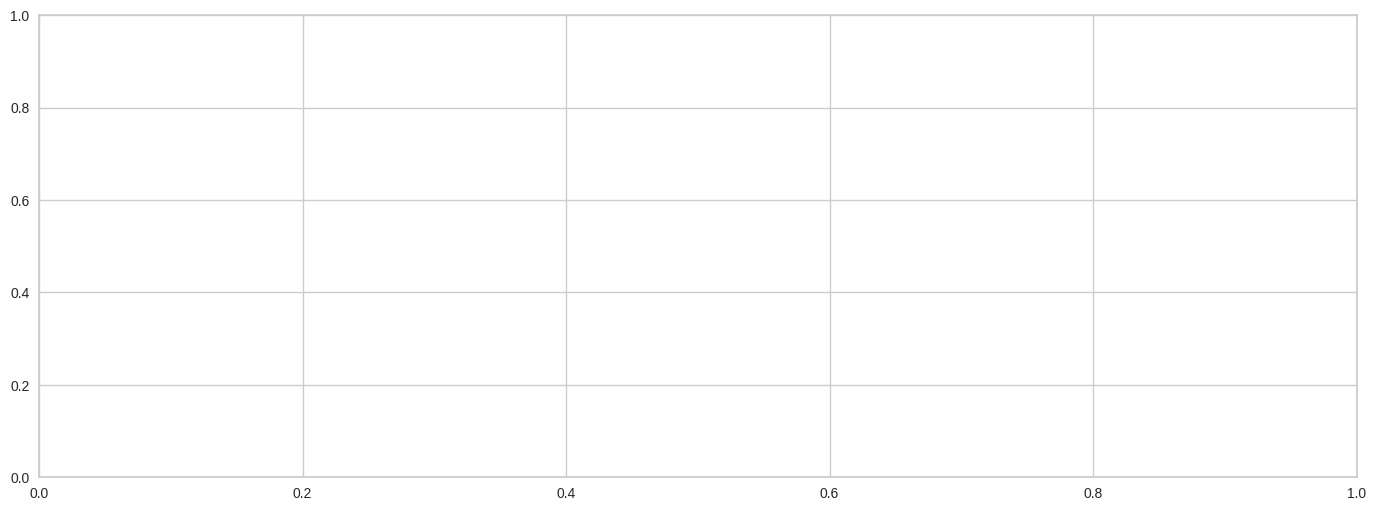

In [ ]:
# 모델 생성 (Functional API)
sc = create_model('sc', num_clusters=7)

evaluate_model(sc)

In [ ]:
# 클러스터링 결과 원본데이터 받아오기
result = assign_model(sc)

df_cluster = pd.concat([result, data[['행정동', '버스정류장ARS번호']]], axis=1)

In [ ]:
# 건대입구 사거리는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5232]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,Cluster,행정동,버스정류장ARS번호
114,35146.332031,10774.666992,86699.335938,12.0,59.584316,328.849854,5.0,652387776.0,0.08093,0.490105,Cluster 2,화양동,5232


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5204]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,Cluster,행정동,버스정류장ARS번호
89,20957.0,4974.0,53744.167969,4.0,97.78656,241.094788,1.0,412792672.0,0.137371,0.249907,Cluster 2,자양3동,5204


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5169]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,Cluster,행정동,버스정류장ARS번호
68,3450.0,276.166656,7934.666504,1.0,340.466675,1968.143066,1.0,638349888.0,0.118303,0.274873,Cluster 1,광장동,5169


In [ ]:
# 같은 클러스터 확인
df_cluster.loc[df_cluster['Cluster'] == 'Cluster 2']

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,Cluster,행정동,버스정류장ARS번호
1,15681.333008,3756.500000,39580.667969,7.0,350.338501,723.257324,3.0,270830848.0,0.145448,0.223181,Cluster 2,중곡1동,5001
3,15281.500000,4266.833496,36958.000000,6.0,318.242950,562.888428,1.0,323892352.0,0.146777,0.232630,Cluster 2,중곡2동,5003
4,18719.500000,6868.500000,48762.500000,6.0,238.122986,637.437317,1.0,273699712.0,0.129653,0.268713,Cluster 2,능동,5004
6,19870.000000,4863.500000,44842.500000,5.0,78.215050,702.566589,1.0,375967552.0,0.158670,0.236506,Cluster 2,구의2동,5006
7,26958.833984,6447.333496,65456.500000,7.0,216.765747,557.314453,1.0,273699712.0,0.129653,0.268713,Cluster 2,능동,5007
53,24268.166016,4937.500000,54723.332031,8.0,223.763870,601.368591,1.0,443511968.0,0.127300,0.264467,Cluster 2,구의1동,5148
89,20957.000000,4974.000000,53744.167969,4.0,97.786560,241.094788,1.0,412792672.0,0.137371,0.249907,Cluster 2,자양3동,5204
100,20126.666016,5016.500000,52191.332031,4.0,128.844650,215.016281,1.0,441175776.0,0.142101,0.270933,Cluster 2,자양4동,5218
114,35146.332031,10774.666992,86699.335938,12.0,59.584316,328.849854,5.0,652387776.0,0.080930,0.490105,Cluster 2,화양동,5232


In [ ]:
df_cluster.loc[df_cluster['Cluster'] == 'Cluster 0', '버스정류장ARS번호'].values

array([5118, 5001, 5002, 5003, 5004, 5005, 5006, 5007, 5140, 5141, 5145,
       5148, 5175, 5188, 5189, 5190, 5191, 5193, 5194, 5204, 5205, 5216,
       5217, 5218, 5220, 5232, 5250, 5251, 5252, 5253, 5162, 5192, 5249,
       5011, 5594, 5582])

## ap

,Description,Value
0,Session id,22
1,Original data shape,"(269, 18)"
2,Transformed data shape,"(269, 10)"
3,Ignore features,8
4,Numeric features,10
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3087,76.0569,1.0838,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

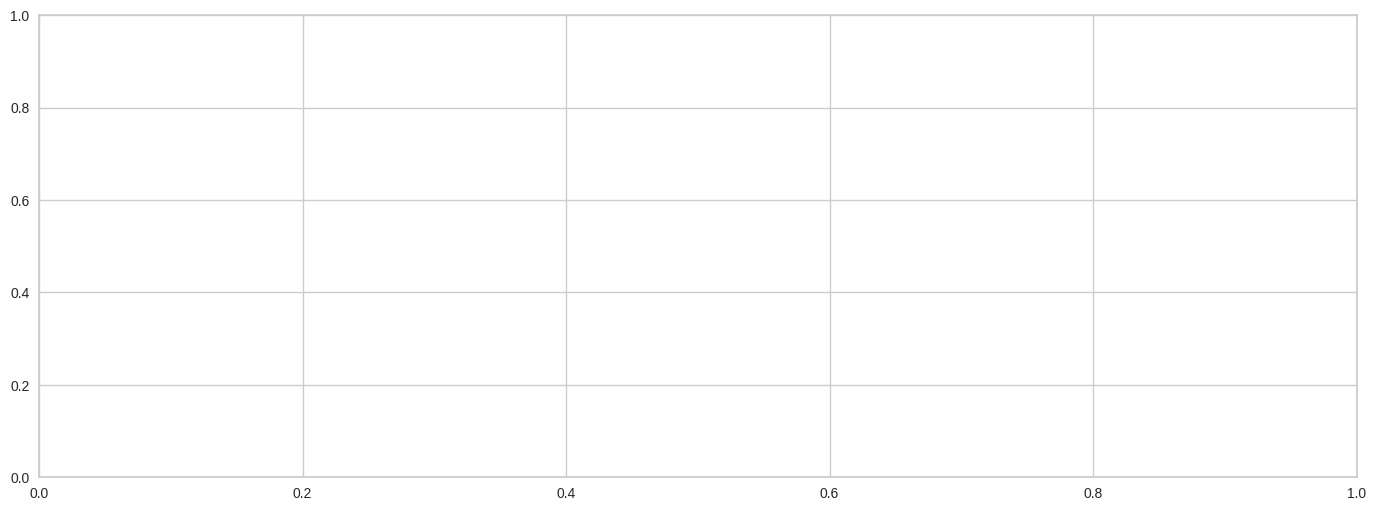

In [ ]:
# 클러스터링 결과 원본데이터 받아오기
s = setup(data, normalize=True, session_id=22, ignore_features=['표준버스정류장ID', '버스정류장ARS번호', '행정동', '대규모점포', '사업체수', '종사자수', '낮시간대 생활인구', '밤시간대 생활인구'])

# 모델 생성 (Functional API)
ap = create_model('ap', num_clusters=6)

evaluate_model(ap)

In [ ]:
# 클러스터링 결과 원본데이터 받아오기
result = assign_model(sc)

df_cluster = pd.concat([result, data[['행정동', '버스정류장ARS번호']]], axis=1)

In [ ]:
# 건대입구 사거리는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5232]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,Cluster,행정동,버스정류장ARS번호
114,35146.332031,10774.666992,86699.335938,12.0,59.584316,328.849854,5.0,652387776.0,0.08093,0.490105,Cluster 2,화양동,5232


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5204]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,Cluster,행정동,버스정류장ARS번호
89,20957.0,4974.0,53744.167969,4.0,97.78656,241.094788,1.0,412792672.0,0.137371,0.249907,Cluster 2,자양3동,5204


In [ ]:
# 모범사례는 어느 클러스터에?
df_cluster.loc[df_cluster['버스정류장ARS번호'] == 5169]

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,Cluster,행정동,버스정류장ARS번호
68,3450.0,276.166656,7934.666504,1.0,340.466675,1968.143066,1.0,638349888.0,0.118303,0.274873,Cluster 1,광장동,5169


In [ ]:
# 같은 클러스터 확인
df_cluster.loc[df_cluster['Cluster'] == 'Cluster 1']

,낮시간대총승객수,밤시간대총승객수,일일총승객수,환승가능노선수,starbucks_distance,market_distance,count,총생활인구수,65세 이상 생활인구 비율,1020 생활인구 비율,Cluster,행정동,버스정류장ARS번호
8,1519.000000,1228.833374,4874.166504,3.0,571.938110,569.341797,1.0,270830848.0,0.145448,0.223181,Cluster 1,중곡1동,5101
9,1342.833374,798.166687,3710.333252,4.0,646.614136,536.140442,1.0,270830848.0,0.145448,0.223181,Cluster 1,중곡1동,5102
10,1305.166626,227.000000,2739.166748,1.0,241.688660,579.848022,0.0,270830848.0,0.145448,0.223181,Cluster 1,중곡1동,5103
11,3237.666748,972.166687,8972.333008,2.0,226.030991,587.225281,0.0,270830848.0,0.145448,0.223181,Cluster 1,중곡1동,5104
12,1051.333374,138.833328,2374.666748,2.0,314.448303,445.938416,0.0,270830848.0,0.145448,0.223181,Cluster 1,중곡1동,5105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2642.166748,214.333328,5278.500000,0.0,242.431580,507.920258,0.0,270780160.0,0.173462,0.204332,Cluster 1,중곡3동,5755
265,459.666656,86.833336,884.833313,0.0,119.009697,1498.395386,0.0,638349888.0,0.118303,0.274873,Cluster 1,광장동,5990
266,217.333328,19.000000,376.500000,0.0,145.110886,1499.883301,0.0,638349888.0,0.118303,0.274873,Cluster 1,광장동,5671
267,500.666656,29.666666,1005.333313,0.0,603.259033,437.388733,0.0,270780160.0,0.173462,0.204332,Cluster 1,중곡3동,5511


In [ ]:
df_cluster.loc[df_cluster['Cluster'] == 'Cluster 0', '버스정류장ARS번호'].values

array([5118, 5001, 5002, 5003, 5004, 5005, 5006, 5007, 5140, 5141, 5145,
       5148, 5175, 5188, 5189, 5190, 5191, 5193, 5194, 5204, 5205, 5216,
       5217, 5218, 5220, 5232, 5250, 5251, 5252, 5253, 5162, 5192, 5249,
       5011, 5594, 5582])